In [52]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 20)

# naložimo razpredelnico, s katero bomo delali
london = pd.read_csv('LONDON.csv')

c:\program files (x86)\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
london.head(10)

,friday,hotelId,price
0,2017-02-03,21688,126
1,2017-02-03,20515,137
2,2017-02-03,10939,208
3,2017-02-03,20098,546
4,2017-02-03,3872807,113
5,2017-02-03,16363485,224
6,2017-02-03,5169,287
7,2017-02-03,4944634,234
8,2017-02-03,3113039,267
9,2017-02-03,116041,162


In [55]:
is_efn = london["hotelId"] == 21688
london[is_efn].count()
london.groupby("hotelId")
london['price']

0       126
1       137
2       208
3       546
4       113
5       224
6       287
7       234
8       267
9       162
10      147
11      201
12      207
13      191
14      455
15      154
16      497
17      145
18      229
19      204
20      156
21      150
22      199
23      162
24      127
25      130
26      197
27      205
28      593
29      177
       ... 
9570    207
9571    136
9572    365
9573    253
9574    121
9575    228
9576    247
9577    305
9578    181
9579    200
9580    335
9581    134
9582    121
9583    390
9584    157
9585    146
9586    122
9587    121
9588    156
9589    136
9590    237
9591     81
9592    205
9593    429
9594    156
9595    179
9596    116
9597    208
9598    152
9599    371
Name: price, dtype: int64

In [ ]:
london[london.price >= 546]

In [57]:
london[london.price < 70]

,friday,hotelId,price
199,2017-02-03,8364,68
4139,2017-06-23,10186970,68
7983,2017-11-03,6882056,63
9327,2017-12-22,1050347,63
9343,2017-12-22,8364,59


In [70]:
hoteli = pd.read_csv('LONDON1Hoteli.csv')

CParserError: Error tokenizing data. C error: Expected 7 fields in line 5, saw 9


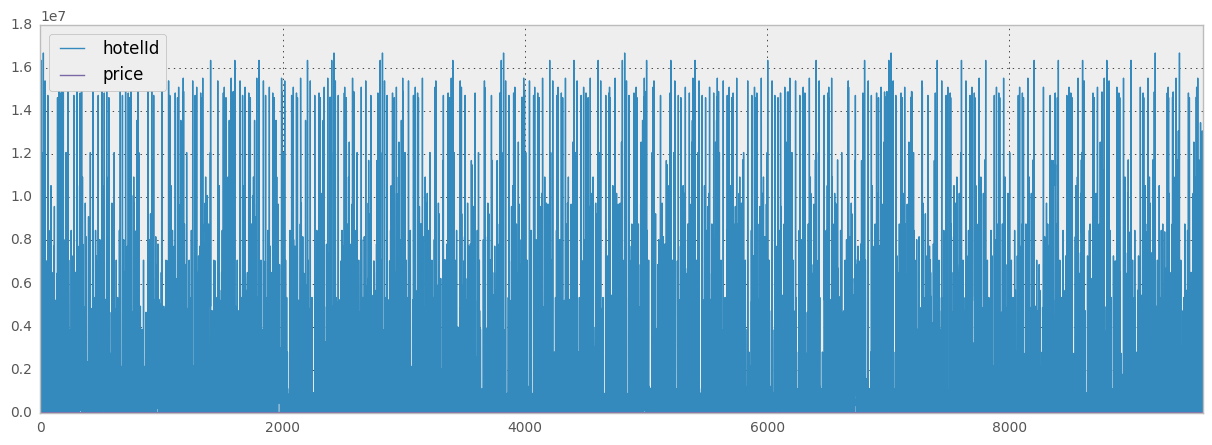

In [66]:
london.plot()

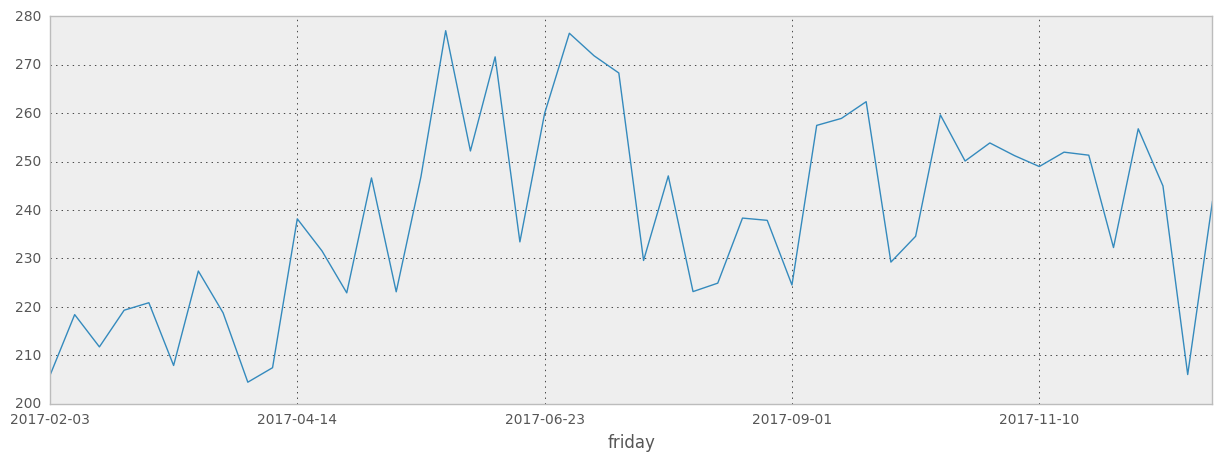

In [59]:
london_po_datumih = london.groupby("friday")
london_po_datumih["price"].mean().plot()

In [60]:
london.sort("price")

c:\program files (x86)\python35-32\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,friday,hotelId,price
9343,2017-12-22,8364,59
7983,2017-11-03,6882056,63
9327,2017-12-22,1050347,63
199,2017-02-03,8364,68
4139,2017-06-23,10186970,68
9332,2017-12-22,1381443,71
9295,2017-12-22,14264,72
8716,2017-12-01,10186970,74
5320,2017-08-04,10186970,74
6078,2017-09-01,14264,74
